# Analysis: 

* BBC trends show the most positive polarity score
* CNN's tweets are the most neutral out of the lister News Channels, because its average compount score is closest to zero.
* The news channels do not show much change over the course of 100 tweets ago compared to current day.

In [1]:
import pandas as pd
import tweepy
import numpy as np
import json
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
twitter_consumer_key = "ThPe6egpT3OJCiRfx7w7lGyVH"
twitter_consumer_secret = "EnGwBptSnjSKEjgIbOi3D4qtRvfjcgnCWm3pDGQscjs07qXbG2"
twitter_access_token = "969396072215818240-ZVyRxct50k8giGAXzKoAVd4uThbuxSu"
twitter_access_token_secret = "tgyVOelmg2LN0FdlbrW37rh55DvMtWzwxj7oQtYRkBy81"

auth = tweepy.OAuthHandler(twitter_consumer_key, twitter_consumer_secret)
auth.set_access_token(twitter_access_token, twitter_access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Twitter accounts to read
news_user = ("@BBC","@CBSNews", "@CNN", "@FoxNews", "@NYTimes")

In [4]:
# setting default values
users = []
sentiment = []
neg = []
pos = []
neut = []
users = []
num = []
dates = []
text = []
oldest_tweet = None
avg_sentiments = []

counter = 0

In [5]:
for user in news_user:
   # 100 most recent tweets
    public_tweets = api.user_timeline(user, count=100, result_type="recent", max_id=oldest_tweet)
    
    counter = 1

    for tweet in public_tweets:
        # sentiment analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])

        # adding to arrays
        sentiment.append(results["compound"])
        neg.append(results["neg"])
        pos.append(results["pos"])
        neut.append(results["neu"])
        users.append(user)
        dates.append(tweet["created_at"])
        text.append(tweet["text"])
        num.append(counter)
        counter +=1
       
avgSentiment = np.mean(sentiment)
avg_sentiments.append(avgSentiment)
        
sentiment_df = pd.DataFrame({"Channel":users, 
                        "Date":dates,
                        "Compound":sentiment,
                        "Negative":neg, 
                        "Positive":pos,
                        "Neutral":neut, 
                        "Text":text,
                        "Tweet Ago": num})

In [6]:
sentiment_df.head()

,Channel,Compound,Date,Negative,Neutral,Positive,Text,Tweet Ago
0,@BBC,0.0000,Sat Mar 17 15:03:12 +0000 2018,0.000,1.000,0.000,"This year, over 250 landmarks across the globe...",1
1,@BBC,0.0000,Sat Mar 17 14:43:43 +0000 2018,0.000,1.000,0.000,"RT @BBCRadio3: ""Even if we found a complete th...",2
2,@BBC,0.8625,Sat Mar 17 14:00:30 +0000 2018,0.000,0.699,0.301,⛷❤️ George has autism and other health conditi...,3
3,@BBC,0.3628,Sat Mar 17 13:46:15 +0000 2018,0.073,0.784,0.143,RT @5liveSport: 'My mates didn't know I was pl...,4
4,@BBC,0.4019,Sat Mar 17 13:00:08 +0000 2018,0.000,0.881,0.119,"Yes, Gary Oldman and @BBCEastEnders' Big Mo ar...",5


In [7]:
sentiment_df.to_csv("NewsMood.csv")

In [8]:
len(text)

500

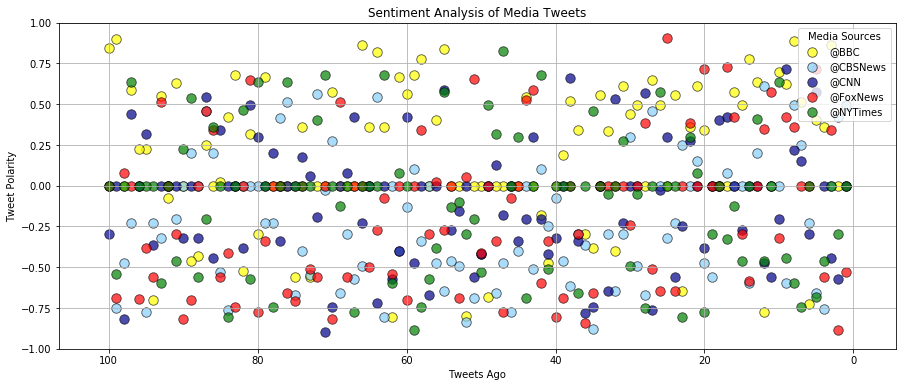

In [9]:
users = sentiment_df["Channel"].unique()
colors = ["yellow", "lightskyblue", "darkblue", "red", "green"]

for i in range(len(users)):
    plt.scatter(x=sentiment_df[sentiment_df["Channel"]==users[i]]["Tweet Ago"].values,
                y=sentiment_df[sentiment_df["Channel"]==users[i]]["Compound"].values,
                s = 90,#*sentiment_df[sentiment_df['User']==users[i]]['Tweets_Ago'].values,
                c = colors[i], label = users[i],
                alpha = .7, edgecolor = 'black', linewidth = .8)

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets")
plt.legend(title="Media Sources", loc="upper right")
plt.grid()
plt.gcf().set_size_inches(15, 6)
plt.rcParams["axes.facecolor"] = "gainsboro"
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.ylim(-1, 1)
plt.savefig("Sentiment_Analysis.png")
plt.show()

In [ ]:
avg_sentiment = {"Channel": target_users, "Average Compound": avg_sentiments}
avg_sentiment_df = pd.DataFrame(avg_sentiment)
avg_sentiment_df

In [ ]:
x_values = np.arange(len(avg_sentiment_df))
plt.figure(figsize=(10, 7))
barlist=plt.bar(x_values, avg_sentiment_df["Average Compound"], alpha=0.5, align='center', width=1)
plt.xticks(x_values, avg_sentiment_df["Channel"], rotation="horizontal")
for i in range(len(barlist)):
    barlist[i].set_color(colors[i])
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based On Twitter")
plt.savefig("Overall_Media_Sentiment.png")
plt.show()